In [26]:
!pip install category-encoders

Defaulting to user installation because normal site-packages is not writeable
  Using cached category_encoders-2.6.0-py2.py3-none-any.whl (81 kB)


In [3]:
#importing libraries
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [6]:
#importing dataset
data=pd.read_csv(r"C:\Users\neetac1973\Downloads\Fraud_check (1).csv")

In [7]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
data.info() #gives information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
data.describe() #describes dataset

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
data.shape # that tells the number of rows and columns of a given DataFrame.

(600, 6)

In [11]:
data.dtypes  #tells about data types of dataset

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

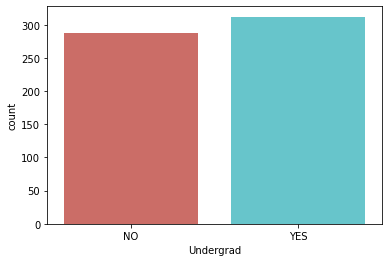

<Figure size 432x288 with 0 Axes>

In [13]:
import seaborn as sns
sns.countplot(x='Undergrad',data=data,palette='hls') #histogram across a categorical, instead of quantitative, variable.
plt.show()
plt.savefig('count_plot')

From here we can observe that there are more undergraduates than the graduated ones.

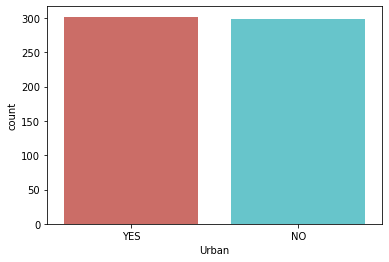

<Figure size 432x288 with 0 Axes>

In [14]:
sns.countplot(x='Urban',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

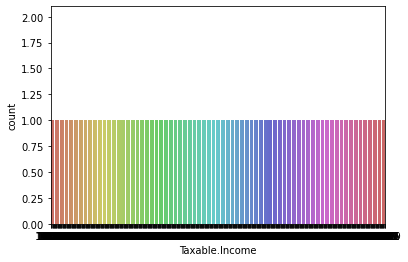

<Figure size 432x288 with 0 Axes>

In [15]:
sns.countplot(x='Taxable.Income',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

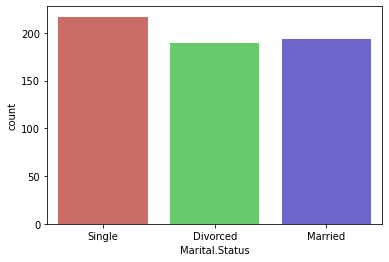

<Figure size 432x288 with 0 Axes>

In [16]:
sns.countplot(x='Marital.Status',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

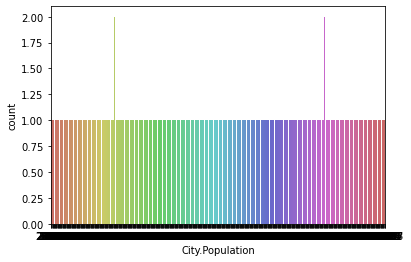

<Figure size 432x288 with 0 Axes>

In [17]:
sns.countplot(x='City.Population',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

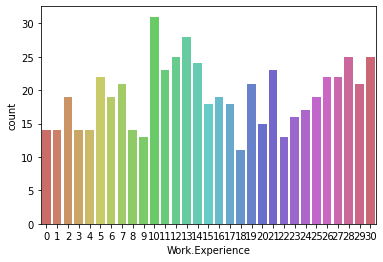

<Figure size 432x288 with 0 Axes>

In [18]:
sns.countplot(x='Work.Experience',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

From the above plot we can say that the highest exprience observed is 10 years.

In [19]:
data.groupby('Undergrad').mean() # allows you to group your data and execute functions on these groups.

,Taxable.Income,City.Population,Work.Experience
Undergrad,,,
NO,56550.048611,104621.795139,15.607639
YES,53969.907051,112555.589744,15.512821


In [20]:
data.groupby('Marital.Status').mean()

,Taxable.Income,City.Population,Work.Experience
Marital.Status,,,
Divorced,57606.052910,109109.100529,15.365079
Married,51397.469072,108240.479381,15.984536
Single,56527.059908,108885.474654,15.345622


In [21]:
data.groupby('Taxable.Income').mean()

,City.Population,Work.Experience
Taxable.Income,,
10003,63701.0,19.0
10150,139642.0,5.0
10163,193995.0,5.0
10329,140885.0,7.0
10348,122705.0,6.0
...,...,...
99239,76337.0,18.0
99307,186239.0,25.0
99311,191983.0,14.0


In [22]:
data.groupby('City.Population').mean()

,Taxable.Income,Work.Experience
City.Population,,
25779,94013.0,16.0
26814,20604.0,9.0
26884,91462.0,13.0
27300,97980.0,1.0
27533,81002.0,28.0
...,...,...
198213,37481.0,25.0
198571,46939.0,19.0
199174,29944.0,10.0


In [23]:
data.groupby('Work.Experience').mean()

,Taxable.Income,City.Population
Work.Experience,,
0,59875.571429,94917.142857
1,53785.285714,86158.500000
2,53549.315789,105663.947368
3,52269.571429,134780.857143
4,59226.857143,115290.500000
5,58855.636364,119153.409091
6,59255.368421,100755.894737
7,49675.571429,122824.571429
8,57014.428571,109195.142857


In [24]:
data.groupby('Urban').mean()

,Taxable.Income,City.Population,Work.Experience
Urban,,,
NO,53346.761745,110757.946309,16.399329
YES,57045.331126,106763.420530,14.728477


In [27]:
import category_encoders as ce

In [28]:
encoder=ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban']) #encode categorical features as an integer array. 
data1=encoder.fit_transform(data)

In [29]:
tax_val = []
for value in data["Taxable.Income"]:
    if value<=30000:
        tax_val.append("Risky")
    else:
        tax_val.append("Good")
        
data1["tax_val"]= tax_val
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good
...,...,...,...,...,...,...,...
595,2,2,76340,39492,7,1,Good
596,2,2,69967,55369,2,1,Good
597,1,2,47334,154058,0,1,Good
598,2,3,98592,180083,17,2,Good


In [30]:
x = data1.drop(['tax_val','Taxable.Income'], axis =1)
y = data1['tax_val']

In [31]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2
...,...,...,...,...,...
595,2,2,39492,7,1
596,2,2,55369,2,1
597,1,2,154058,0,1
598,2,3,180083,17,2


In [32]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_val, Length: 600, dtype: object

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40) #helps us create our training data and test data.

In [34]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
3,2,1,193264,15,1
149,1,1,49505,25,2
212,2,2,112659,14,2
585,1,1,137622,2,1
524,2,3,164391,27,2
...,...,...,...,...,...
440,1,1,170407,13,1
165,2,3,38463,23,1
7,2,1,131253,3,1
219,2,2,26814,9,2


In [35]:
y_train

3       Good
149     Good
212     Good
585     Good
524    Risky
       ...  
440     Good
165     Good
7       Good
219    Risky
326    Risky
Name: tax_val, Length: 420, dtype: object

In [36]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
159,2,1,28504,1,2
307,1,2,31819,25,2
253,2,1,77256,29,2
528,1,3,172612,10,2
137,2,1,115884,6,2
...,...,...,...,...,...
221,2,1,134135,14,2
390,2,1,57324,17,2
530,2,2,194421,17,1
232,2,3,150349,2,2


In [37]:
y_test

159     Good
307     Good
253     Good
528     Good
137    Risky
       ...  
221     Good
390     Good
530     Good
232    Risky
139     Good
Name: tax_val, Length: 180, dtype: object

In [38]:
#Building Decision Tree Classifier using Entropy Criteria
model=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [39]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts()

Good    180
dtype: int64

In [41]:
pd.crosstab(y_test,preds) #used to compute a simple cross tabulation of two (or more) factors

col_0,Good
tax_val,
Good,140
Risky,40


In [42]:
np.mean(preds==y_test) # will average out the value between 0-1 which will be appended to error rate

0.7777777777777778

In [43]:
print(classification_report(preds,y_test)) 
#used to show precision, recall, F1 Score, and support score of trained classification model

              precision    recall  f1-score   support

        Good       1.00      0.78      0.88       180
       Risky       0.00      0.00      0.00         0

    accuracy                           0.78       180
   macro avg       0.50      0.39      0.44       180
weighted avg       1.00      0.78      0.88       180



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Decision tree using Entropy')

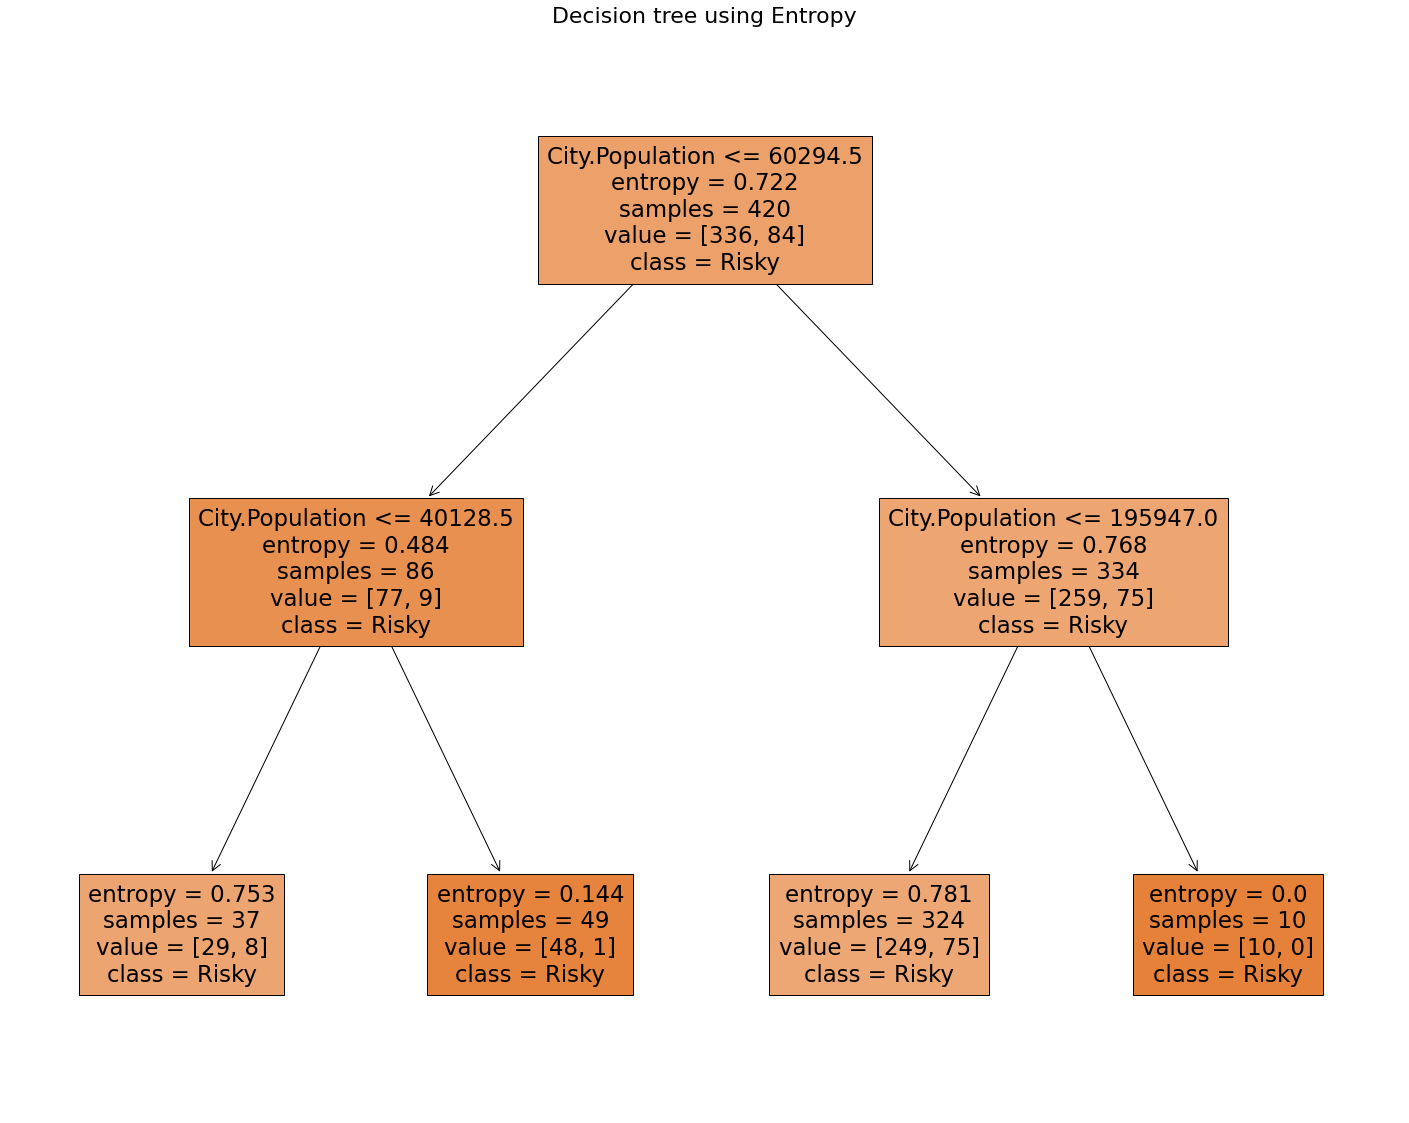

In [44]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

In [45]:
##Building Decision Tree Classifier (CART) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=2)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [46]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7777777777777778

Text(0.5, 1.0, 'Decision tree using Gini')

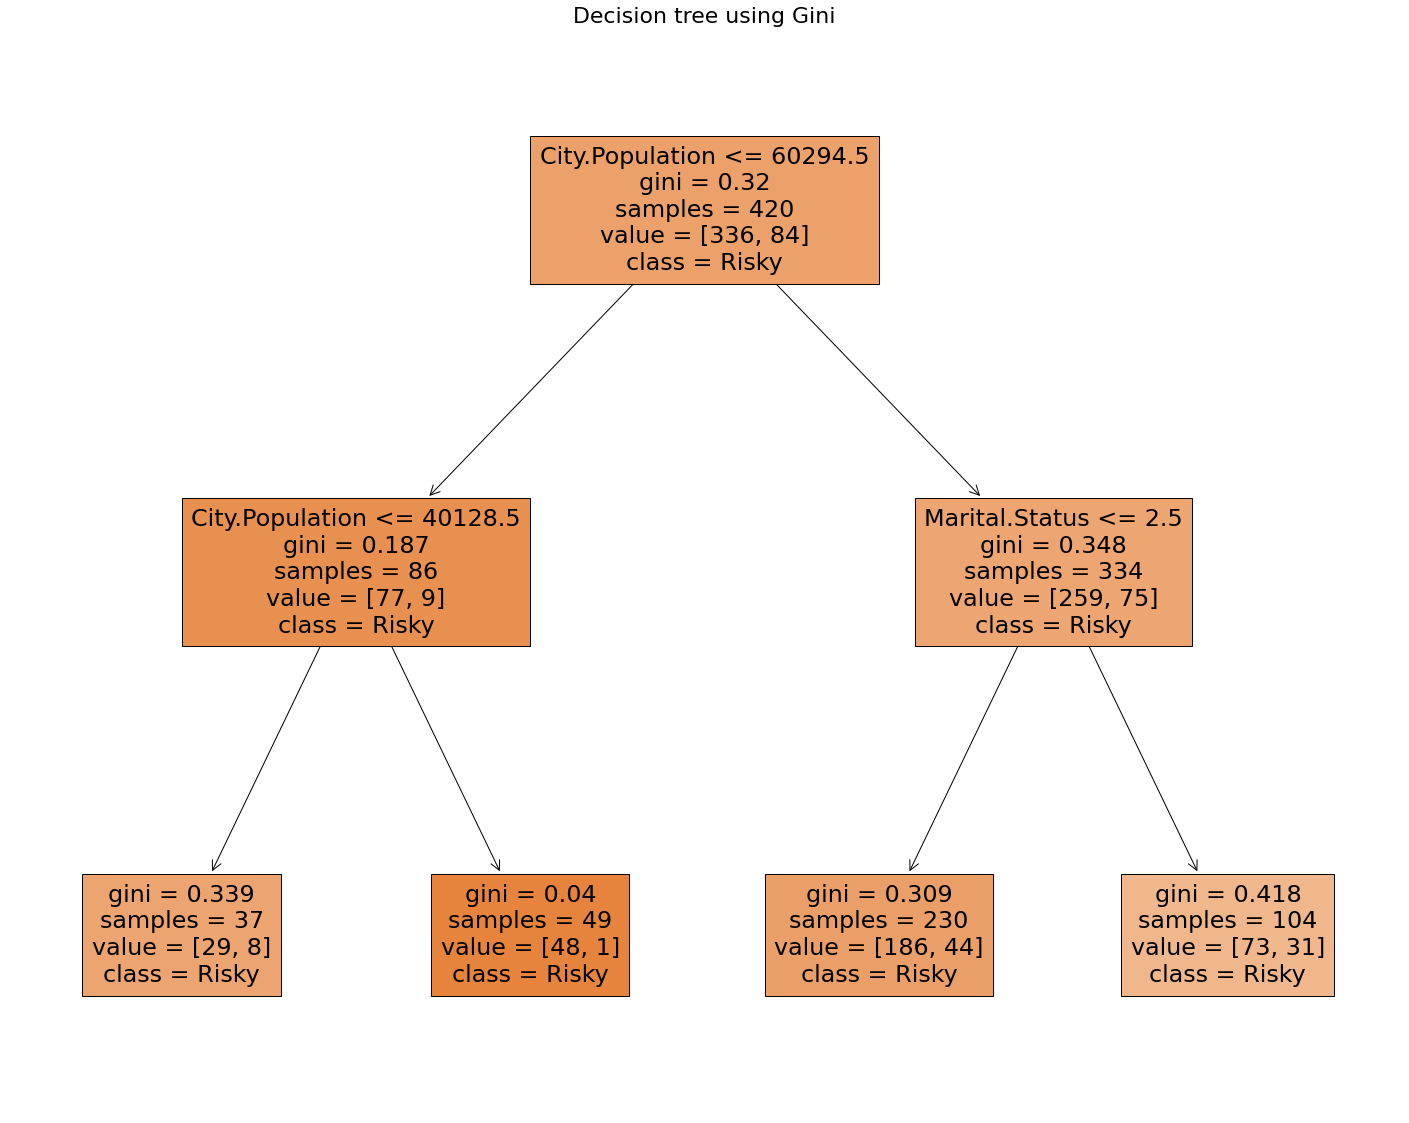

In [47]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)

Hence from here we can understand that the most important features out of here is marital status and city count.